In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-on-movie-reviews/train.tsv.zip
/kaggle/input/sentiment-analysis-on-movie-reviews/sampleSubmission.csv
/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip


In [2]:
train_data = pd.read_csv("/kaggle/input/sentiment-analysis-on-movie-reviews/train.tsv.zip", sep="\t")
test_data = pd.read_csv("/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip", sep="\t")
all_data = pd.concat((train_data, test_data))

train_data.sample(20)


# The sentiment labels are:

# 0 - negative
# 1 - somewhat negative
# 2 - neutral
# 3 - somewhat positive
# 4 - positive

,PhraseId,SentenceId,Phrase,Sentiment
98058,98059,5137,also comes with the laziness and arrogance of ...,0
130202,130203,7010,like Slob City reductions of Damon Runyon crooks,1
76343,76344,3921,a transcript,2
117178,117179,6252,expose the life of male hustlers,2
34755,34756,1635,American and European cinema has amassed a vas...,2
108099,108100,5719,become commonplace in movies that explore the ...,2
56626,56627,2844,I for one enjoyed the thrill of the chill,3
48865,48866,2386,Great over-the-top,3
126579,126580,6805,program run,2
67221,67222,3410,dragon drama,2


In [3]:
all_data.describe(include = "all")

,PhraseId,SentenceId,Phrase,Sentiment
count,222352.000000,222352.000000,222352,156060.000000
unique,NaN,NaN,212055,NaN
top,NaN,NaN,Bob,NaN
freq,NaN,NaN,2,NaN
mean,111176.500000,5879.059550,NaN,2.063578
std,64187.637865,3506.664769,NaN,0.893832
min,1.000000,1.000000,NaN,0.000000
25%,55588.750000,2775.000000,NaN,2.000000
50%,111176.500000,5893.000000,NaN,2.000000
75%,166764.250000,8987.000000,NaN,3.000000


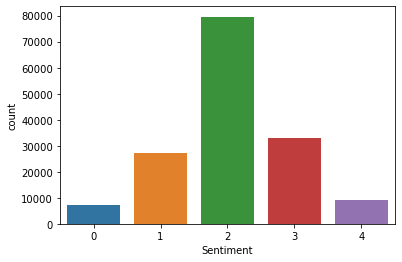

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
a = sns.countplot(train_data["Sentiment"])

In [5]:
print(vectorizer.get_feature_names())
print(X.toarray())

NameError: name 'vectorizer' is not defined

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.max_colwidth', -1)

tt = train_data.iloc[:,2]
tt_y = train_data.iloc[:,3]
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(tt)
print(vectorizer.get_feature_names())
print(X.toarray())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


['000', '10', '100', '101', '102', '103', '104', '105', '10th', '11', '110', '112', '12', '120', '127', '129', '12th', '13', '13th', '14', '140', '146', '15', '15th', '16', '163', '168', '170', '1790', '18', '1899', '19', '1915', '1920', '1930s', '1933', '1937', '1938', '1940s', '1950', '1950s', '1952', '1953', '1957', '1958', '1959', '1960', '1960s', '1962', '1970', '1970s', '1971', '1972', '1973', '1975', '1979', '1980', '1980s', '1984', '1986', '1987', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1997', '1998', '1999', '19th', '20', '2000', '2001', '2002', '20th', '21', '21st', '22', '24', '2455', '25', '26', '270', '295', '30', '300', '3000', '30s', '37', '3d', '40', '40s', '42', '451', '48', '4ever', '4th', '4w', '50', '500', '50s', '51', '51st', '52', '53', '5ths', '60', '60s', '65', '65th', '66', '70', '70s', '71', '72', '75', '77', '78', '7th', '80', '800', '80s', '83', '84', '85', '86', '87', '88', '89', '8th', '90', '90s', '91', '93', '94', '95', '96', '98', '99',

In [7]:
# from sklearn.linear_model import LogisticRegressionCV as logit
from sklearn.linear_model import LogisticRegression as logit
model = logit(max_iter = 1000, random_state=0).fit(X,tt_y)
model.score(X,tt_y)

0.7165192874535435

In [8]:
tt2 = test_data.iloc[:,2]
test_X = vectorizer.transform(tt2)
predict_y = model.predict(test_X)

predict_y

array([3, 3, 2, ..., 2, 2, 2])

In [9]:
test_data["PhraseId"]

0        156061
1        156062
2        156063
3        156064
4        156065
          ...  
66287    222348
66288    222349
66289    222350
66290    222351
66291    222352
Name: PhraseId, Length: 66292, dtype: int64

In [10]:
data_to_submit = pd.DataFrame({"PhraseId":test_data["PhraseId"],"Sentiment":predict_y})

In [11]:
data_to_submit.to_csv('csv_to_submit.csv', index = False)